<a href="https://colab.research.google.com/github/drypuddle1220/Sports_Betting_Analytics/blob/main/xboostmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# prompt: import the file final_df.csv and then make it into a datafram

import pandas as pd

# Assuming final_df.csv is in the current working directory
# or provide the full path if it's elsewhere.
try:
  df_merge_pot = pd.read_csv('/content/games_post_2022 (append).csv')

except FileNotFoundError:
  print("Error: final_df.csv not found. Please check the file path.")




In [33]:
# prompt: import the file final_df.csv and then make it into a datafram

import pandas as pd

# Assuming final_df.csv is in the current working directory
# or provide the full path if it's elsewhere.
try:
  df = pd.read_csv('final_df.csv')

except FileNotFoundError:
  print("Error: final_df.csv not found. Please check the file path.")

In [34]:
df_merge_pot = df_merge_pot[['potential_y', 'GAME_ID']]
df_merge_pot

,potential_y,GAME_ID
0,5244.340204,21900491
1,5244.340204,21900477
2,5244.340204,21900469
3,5244.340204,21900444
4,5244.340204,21900431
...,...,...
5821,4343.847836,21700629
5822,4343.847836,21700618
5823,4343.847836,21700603
5824,4343.847836,21700577


In [35]:

# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [36]:
df = df.merge(df_merge_pot, on='GAME_ID', how='left')
df['agr_pot'] = df['potential_y'] - df['injury_pot']
df.shape

(11602, 34)

In [88]:

# Remove duplicates based on 'GAME_ID', keeping the first occurrence
df = df.drop_duplicates(subset='GAME_ID', keep='first')

df

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,BLK,TOV,PF,PLUS_MINUS,Total_Pts,injury_pot,avg_pace,agr_off,potential_y,agr_pot
0,22019,1610612737,ATL,Atlanta Hawks,21900491,2019-12-30,ATL @ ORL,W,240,101,...,4,20,20,8.0,210.0,897.697449,45.595952,965.250000,5244.340204,4346.642756
2,22019,1610612737,ATL,Atlanta Hawks,21900477,2019-12-28,ATL @ CHI,L,239,81,...,5,19,16,-35.0,127.0,318.286035,39.351542,951.062500,5244.340204,4926.054169
4,22019,1610612737,ATL,Atlanta Hawks,21900469,2019-12-27,ATL vs. MIL,L,239,86,...,8,18,18,-26.0,146.0,0.000000,42.174058,893.422917,5244.340204,5244.340204
6,22019,1610612737,ATL,Atlanta Hawks,21900444,2019-12-23,ATL @ CLE,L,239,118,...,7,16,20,-3.0,233.0,1280.050975,53.901478,1017.227083,5244.340204,3964.289229
8,22019,1610612737,ATL,Atlanta Hawks,21900431,2019-12-21,ATL @ BKN,L,240,112,...,5,10,22,-10.0,214.0,1222.278910,59.075175,999.222917,5244.340204,4022.061294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11067,22018,1610612765,DET,Detroit Pistons,21800405,2018-12-12,DET @ CHA,L,240,107,...,10,14,26,3.8,217.8,1254.470506,49.119375,1041.172917,3346.473065,2092.002559
11095,22018,1610612765,DET,Detroit Pistons,21800184,2018-11-11,DET vs. CHA,L,238,103,...,4,10,18,-10.0,196.0,1209.772710,46.460218,1062.170833,3346.473065,2136.700356
11187,22017,1610612765,DET,Detroit Pistons,21700892,2018-02-25,DET @ CHA,L,239,98,...,2,17,22,-16.0,180.0,0.000000,38.294423,1014.241667,3346.473065,3346.473065
11221,22017,1610612765,DET,Detroit Pistons,21700638,2018-01-15,DET vs. CHA,L,240,107,...,5,16,24,-11.0,203.0,1540.520453,53.710208,1055.768750,3346.473065,1805.952613


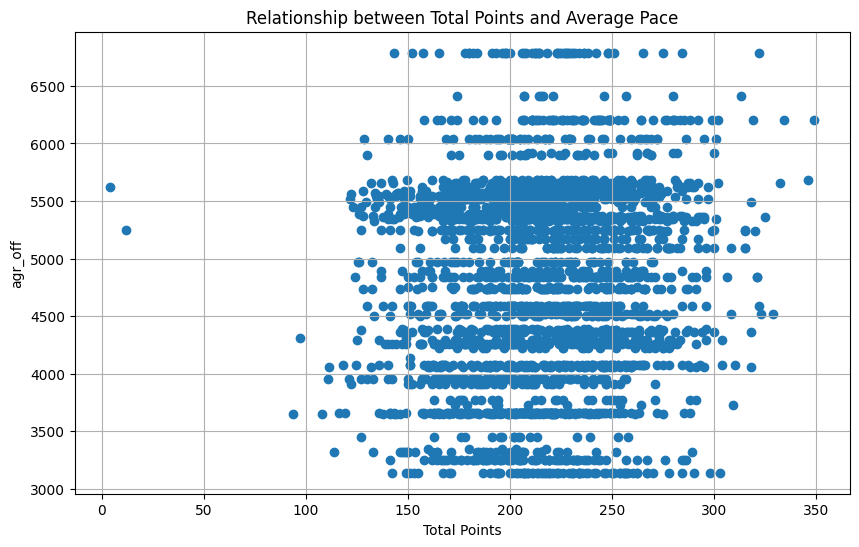

In [92]:
# prompt: plot the relationship between total points and avg_pace in df

import pandas as pd
import matplotlib.pyplot as plt


try:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Total_Pts'], df['potential_y'])
    plt.xlabel('Total Points')
    plt.ylabel('agr_off')
    plt.title('Relationship between Total Points and Average Pace')
    plt.grid(True)
    plt.show()

except KeyError as e:
  print(f"Error: Column '{e}' not found in the dataframe. Please check column names.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

In [108]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

X = df[['avg_pace', 'agr_off', 'potential_y']]
y = df['Total_Pts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 2045, number of used features: 3
[LightGBM] [Info] Start training from score 215.266015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [109]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
}

grid_search = GridSearchCV(estimator=xgb_r, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_X, train_y)

# Use the best estimator
best_model = grid_search.best_estimator_

In [110]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=123, ...)